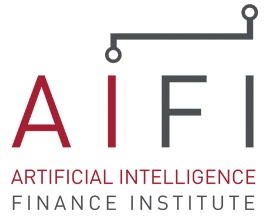


# Bootcamp - Supervised Machine Learning

# AI Acts 

The EU AI Rulebook, the AI Act, will be effective starting 2027. 
The Act will not only impose requirements for AI in the EU, a population of 450 million people, but also set precedent for AI regulation around the world, called the Brussels effect.


## Risk Management & Data Governance 

- An AI risk management system must be established, implemented, documented, and maintained in relation to __high-risk AI systems__. 
- Ensuring the __high quality of input data sets__. Poor-quality data, such as incomplete or biased data, can lead to inaccurate, discriminative, or incorrect outcomes

## Technical Documentation & Traceability

- Detailed information about the monitoring, functioning and control of the AI system.
- A description of any change made to the system through its lifecycle.

## Transparency & Human Oversight

- Powerful AI algorithms such as neural networks, or deep learning, are highly opaque in their function.
- The human oversight measures including the technical measures put in place to facilitate the interpretation of the outputs of AI systems.

## Accuracy, Robustness & Cybersecurity

-  Errors, faults, or inconsistencies that may occur within the system or the environment in which the system operates, due to their interaction with natural persons or other systems
- Attempts by unauthorized third parties to alter their use or performance by exploiting the system vulnerabilities.

## Testing data pipelines / data validation with Great Expectations

# About this Notebook

# Imports

In [1]:
%%capture
!pip install pandera
!pip install great_expectations

In [ ]:
import great_expectations as ge
import pandas as pd


## What is Data Validation?

Data validation is having checks in place to make sure that data comes in the format and specifications that we expect. All we're basically doing is asking if the data is valid for the way it's about to be used. This question can be asked at multiple stages of the data application lifecycle. It can be asked as we ingest input data, after we transform the data, or before uploading it for end-user consumption.

Common validations are checking if:

* the column contains null values
* a column exists
* some statistics are as expected
* the shape of the DataFrame

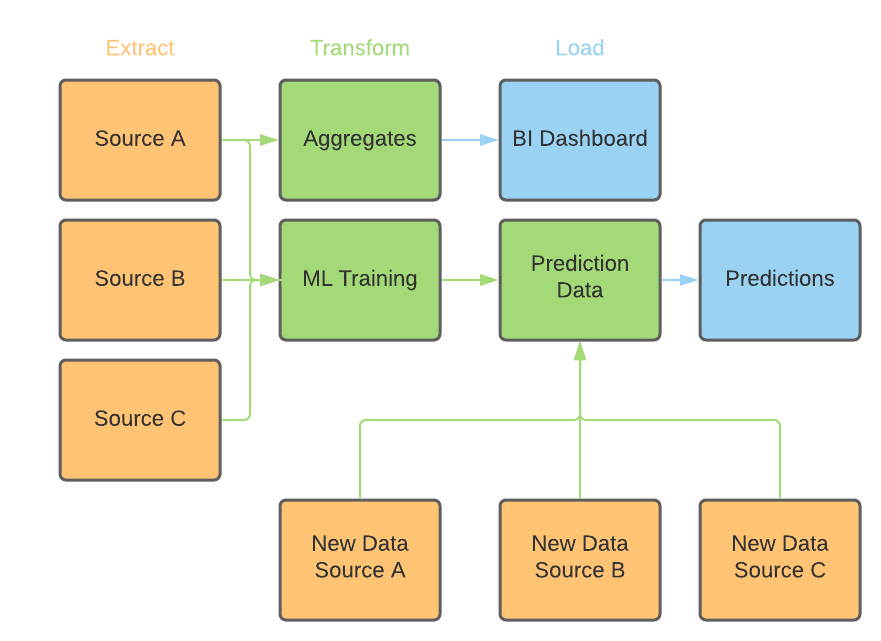

## Why Use a Data Validation Framework?

Some of these validations may be easy enough to do ourselves. In fact, we may already be doing it. For example, we can use the Python native `assert` keyword to perform validation.

In [3]:
df = pd.DataFrame({'a': [1,2,3,4], 'b': [1,None,1,None]})
df['c'] = 1

df.head()

,a,b,c
0,1,1.0,1
1,2,NaN,1
2,3,1.0,1
3,4,NaN,1


In [4]:
# Check we have 4 rows
assert df.shape[0] == 4

# Check column a is not null
assert df['a'].notnull().all()

That works for simple checks. If our data was always upto the standard, this would be fine. But of course, data in the real world is dynamic and often unpredictable. Pipelines inevitably break. Aside from simple checks, a key component of these validation frameworks is reporting. How would we get the rows that fail validations?

Let's see an example asserting column b must not be NULL for the same DataFrame.

In [5]:
try:
    assert df['b'].notnull()
except:
    print(df.loc[df['b'].isnull()])

   a   b  c
1  2 NaN  1
3  4 NaN  1


For a simple example, we can get the index and rows of the validations that fail, but:

* **What if we have multiple validations we want to run simultaneously?**
* **What if we want more details into the failure cases?**
* **What if we wanted to continue after failure? What if we wanted to error?**

All of these cases become a lot of work to code, making it easier to reach for existing data validations tools.

## Where can things go wrong?

In a collaborative setting, it is inevitable that changes occur without other people knowing. In a lot of cases, this can be as the application is being monitored.



### Scenario 1 - Changes in Source Collection

There may be changes in the way data is collected upstream that make our pipeline invalid. There can be changes in schema of tables, units, or even acceptable values. Think of situations where there were two categories, and then suddenly a third one is added. These would require downstream operations to change.



### Scenario 2 - Shared Pipelines

Often data projects will share the same data. These pipelines can be shared my multiple teams, and should be to avoid unnecessary recomputation. One team's changes may change the values in a table without another team knowing.



### Scenario 3 - Unseen Data Shows Up

Bad data could cause embarassing machine learning predictions being published.

### Scenario 4 - Data Collection Fails for a Bit

Data can becoming missing or stale when the underlying infrastructure goes down temporarily.

## Current Data Validation Landscape (Open Source)

[Great Expectations](https://github.com/great-expectations/great_expectations/)
* Currently the most popular data validation framework. It supports execution on Pandas, Spark, and SQL through SQLAlchemy. They are also widely known for data documentation where you can produce artifacts attached to the validations performed that can then be shared with the team.



[Pandera](https://github.com/pandera-dev/pandera)
* A lightweight data validation framework meant for Pandas. While Great Expectations focuses on connecting to data sources such as parquet files or databases, Pandera is meant to validate in-memory Pandas DataFrames. In fact, they can be used in conjuction with each other.

[SodaSQL](https://github.com/sodadata/soda-sql)
* A SQL validation framework that validates on databases with SQL. We will not go over this as we are more focused with the Pandas-based validation frameworks.

## Machine Learning Drift

Though not covered here, another form of validation is specifically machine learning validation. In this diagram by Databricks, we see that the model performance drifts over time. A form of validation would be checking if the input data is drifting over time, that could then cause unstable predictions.

![model_drift](https://databricks.com/wp-content/uploads/2019/09/model_drift.jpg)

[source](https://databricks.com/blog/2019/09/18/productionizing-machine-learning-from-deployment-to-drift-detection.html)

Machine Learning Drift is a phenomenon that occurs when the statistical properties of the model's inputs or outputs change over time. This may happen due to a variety of reasons such as changes in user behavior, operational changes in the data pipeline, or even due to changes in broader market or environmental conditions.



This drift is important to monitor because models are trained on historical data with the assumption that the future will behave like the past. When this assumption is violated, model performance can degrade, sometimes drastically. Therefore, it's crucial to detect and address this drift promptly to maintain the model's performance.



Data validation plays a crucial role in monitoring machine learning drift. Regularly validating your data against predefined schemas can help in early detection of shifts in the distribution of features or appearance of previously unseen values. This can act as an early warning system for potential machine learning drift.



Furthermore, data validation can also aid in identifying upstream data changes such as missing features, changes in data types, etc. These changes often lead to unexpected model behavior and are a common cause of model drift.

By integrating data validation checks into your machine learning pipelines, you can maintain a robust and reliable system that can handle changes in data gracefully and ensure that your models continue to make accurate predictions.

## When is Data Validation Done?

In the model drift diagram, the stages of data projects are shown. One project is a data analysis for business intelligence project, while the other one is a machine learning model project. The machine learning project just has more transform steps before results are generated and outputted.

Machine learning can be done at various points of this project lifecycle. These are not mutually exclusive, and in fact, when using lightweight validations, it would be best practice to run validation as much as possible.



1. **Source Validation** - checking if the source data is upto standard
2. **Transformation Validation** - checking if the data was altered incorrectly during the transformation steps
3. **Result Validation** - validations can be performed right before the results are published.

## What Happens When Validation Fails?

Errors can be preemptively captured and pipelines can be stopped with failure reports. In some cases, pipelines can be continued. The most important thing about validation in production is getting insight into potential failures before they even occur. The validation is a contract of that the data needs to fulfill in order for the data pipeline to succeed.

## About Great Expectations

Great Expectations is the leading Python-based validation framework. 

Key Features:

* Pandas, Spark, and SQL Support
* Data Profiling
* Data Documentation
* Data Validation

The `great_expectations` library as a `from_pandas()` method that can take in a `pandas DataFrame`. This `ge_df` will have all of the available method of the standard `pandas DataFrame`. This allows us to do data exploration with the `ge_df`.

But the important part is that we get expectation methods on the same `pandas DataFrame`. In the example below, we are using the `expect_columns_values_to_be_between` expectations. The first three arguments are very intuitive. The last two arguments are the ones that need some explaining.



The `mostly` parameter sets the threshold of the percentage of records that can fail. By setting it at 0.99, this means that 1% of records can fail until the validation is considered to have failed.

The `result_format` just denotes the detail we want the failure report to have. We'll go over this more in a bit.

### Why you want to use data validation


You could just simple check your data with simple asserts, but this is not the best approach, here are a few reasons why you want to use either Great Expectations or Pandera:

- __Expressiveness__: These libraries allow you to express complex validation rules in a more concise, readable, and maintainable way. For instance, you can specify a range of acceptable values for a numerical column in a single line.

- __Scalability__: Libraries like Pandera and Great Expectations are built to handle large data sets efficiently. This is not always the case with assert statements, which can be slow and consume a lot of memory when dealing with large data sets.

- __Error Handling__: These libraries provide better error messages when a validation fails, which can help you identify and fix issues faster. In contrast, an assert statement will just raise an AssertionError with an optional error message, which may not provide enough context about the problem.

- __Extensibility__: These libraries provide a lot of built-in checks, but they also allow you to define your own custom validation rules. This can be much harder to do with assert statements.

- __Integration__: Both Pandera and Great Expectations can be integrated into data pipelines to automate the process of data validation. They also provide features for documenting your data validation process and even for generating data quality reports.

The later can be beneficial for the upcoming EU AI Act, since EU AI Act places emphasis on trust, transparency, and accountability in AI systems, and this includes the data that powers these systems. Quality assurance for data, which includes processes like data validation, is a key aspect of this. It is essential to ensure that data used in AI systems is accurate, reliable, and free of bias.

In this context, the ability of tools like Pandera and Great Expectations to document data validation rules and generate data quality reports can be extremely useful. Such documentation can serve as proof that an organization has implemented robust quality assurance processes for their data, and the reports can be used to demonstrate compliance with the Act's requirements.

Additionally, these tools can help detect and rectify issues early in the data processing pipeline, reducing the risk of building AI models on flawed data and potentially violating regulations. Automating the process as part of a data pipeline ensures that this validation is not a one-off task but an ongoing process that keeps the data in check constantly.

## Example expectations

Expectations are human readable configurable assertions on data. Check out the [glossary of expectations](https://docs.greatexpectations.io/docs/reference/glossary_of_expectations) for a full list. Here we'll just go over a few to give an idea of what is available.

**Table shape**

* expect_column_to_exist
* expect_table_columns_to_match_ordered_list
* expect_table_columns_to_match_set

**Missing values, unique values, and types**

* expect_column_values_to_be_unique
* expect_column_values_to_not_be_null
* expect_column_values_to_be_null

**Sets and ranges**

* expect_column_values_to_be_in_set
* expect_column_values_to_not_be_in_set
* expect_column_values_to_be_between

**String matching**

* expect_column_value_lengths_to_be_between
* expect_column_value_lengths_to_equal
* expect_column_values_to_match_regex



**Datetime and JSON parsing**

* expect_column_values_to_match_strftime_format
* expect_column_values_to_be_dateutil_parseable

**Aggregate functions**

* expect_column_distinct_values_to_equal_set
* expect_column_mean_to_be_between
* expect_column_median_to_be_between
* expect_column_max_to_be_between


**Multi-column**
* expect_column_pair_values_A_to_be_greater_than_B

* expect_column_pair_values_to_be_equal

* expect_multicolumn_sum_to_equal


**Distributional functions**
* expect_column_kl_divergence_to_be_less_than
* expect_column_bootstrapped_ks_test_p_value_to_be_greater_than
* expect_column_chisquare_test_p_value_to_be_greater_than

## Results

The full details of Results settings can be found [here](https://docs.greatexpectations.io/docs/reference/expectations/result_format/). The thing to note is that there are varying degrees of details we can get.

| result_format Setting | Example use case                                             |
|-----------------------|--------------------------------------------------------------|
| BOOLEAN_ONLY          | Automatic validation. No result is returned.                 |
| BASIC                 | Exploratory analysis in a notebook.                          |
| SUMMARY               | Detailed exploratory work with follow-on investigation.      |
| COMPLETE              | Debugging pipelines or developing detailed regression tests. |

### Using Great Expectations

We can define a `DataFrameSchema` as shown in the following code example. 

In [2]:
import yfinance as yf
import pandera as pa

# Fetch data
data = yf.download('AAPL', start='2020-01-01', end='2022-12-31')

# Define schema
schema = pa.DataFrameSchema(
    {
        "Open": pa.Column(pa.Float, checks=pa.Check.greater_than_or_equal_to(0)),
        "High": pa.Column(pa.Float, checks=pa.Check.greater_than_or_equal_to(0)),
        "Low": pa.Column(pa.Float, checks=pa.Check.greater_than_or_equal_to(0)),
        "Close": pa.Column(pa.Float, checks=pa.Check.greater_than_or_equal_to(0)),
        "Adj Close": pa.Column(pa.Float, checks=pa.Check.greater_than_or_equal_to(0)),
        "Volume": pa.Column(pa.Int, checks=pa.Check.greater_than_or_equal_to(0)),
    },
    index=pa.Index(pa.DateTime),
)

# Validate data
validated_data = schema(data)


[*********************100%***********************]  1 of 1 completed


In [3]:
# Validate data
validated_data = schema(data)

In [ ]:
# Convert to a Great Expectations dataset
ge_df = ge.from_pandas(data)

# Add expectations. For example, expect column values to not be null
ge_df.expect_column_values_to_not_be_null("Close")
ge_df.expect_column_values_to_be_between("Close", min_value=0)

# Expect 'Volume' to be an integer
ge_df.expect_column_values_to_be_of_type("Volume", "int64")

# Validate the data
results = ge_df.validate()

# Just print the json 
print(results)

In [4]:
# Extract results
results_list = results["results"]

summary_list = []
for res in results_list:
    summary = {
        "Expectation": res["expectation_config"]["expectation_type"],
        "Column": res["expectation_config"]["kwargs"]["column"],
        "Success": res["success"]
    }
    summary_list.append(summary)

summary_df = pd.DataFrame(summary_list)

# Print out concise info
print(summary_df)


{
  "results": [
    {
      "expectation_config": {
        "meta": {},
        "expectation_type": "expect_column_values_to_not_be_null",
        "kwargs": {
          "column": "Close",
          "result_format": "BASIC"
        }
      },
      "exception_info": {
        "raised_exception": false,
        "exception_message": null,
        "exception_traceback": null
      },
      "meta": {},
      "success": true,
      "result": {
        "element_count": 756,
        "unexpected_count": 0,
        "unexpected_percent": 0.0,
        "unexpected_percent_total": 0.0,
        "partial_unexpected_list": []
      }
    },
    {
      "expectation_config": {
        "meta": {},
        "expectation_type": "expect_column_values_to_be_between",
        "kwargs": {
          "column": "Close",
          "min_value": 0,
          "result_format": "BASIC"
        }
      },
      "exception_info": {
        "raised_exception": false,
        "exception_message": null,
        "exception_t